In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Initialize the required attributs

n_features = 20
n_nodes = 3

X = tf.placeholder(tf.float32,(None,n_features))
W = tf.Variable(initial_value=tf.random_normal((n_features,n_nodes)))
B = tf.Variable(tf.ones(n_nodes))

In [3]:
WX = tf.matmul(X,W)

In [4]:
Z = tf.add(WX,B)

In [5]:
A = tf.sigmoid(Z)

In [6]:
init = tf.global_variables_initializer()

In [7]:
with tf.Session() as sess:
    
    sess.run(init)
    
    output = sess.run(A,feed_dict={X:np.random.random([1,n_features])})

In [8]:
print(output)

[[ 0.52190769  0.81267196  0.5003674 ]]


# Building a simple regression classifier

In [125]:
X = np.linspace(0,10,10) + np.random.uniform(-1,1,10)
X

array([ -0.67234403,   1.21240792,   2.15943515,   2.98249868,
         4.09735179,   5.37431661,   6.90973916,   8.26094935,
         8.55075826,  10.42683746])

In [126]:
Y = np.linspace(0,10,10) + np.random.uniform(-1,1,10)
Y

array([ 0.60377891,  1.83822086,  1.60786111,  3.28903265,  5.14386637,
        4.85391728,  5.737396  ,  8.32517428,  7.96930763,  9.14184905])

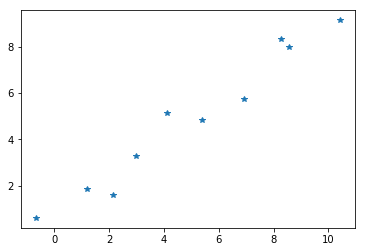

In [127]:
plt.plot(X,Y,'*')

## Basic linear regression formula  Y = MX + C

In [128]:
np.random.randn(2)

array([ 1.31241777, -2.05086619])

In [129]:
M = tf.Variable(-0.40)
C = tf.Variable(1.05)

In [138]:
error = 0

for x,y in zip(X,Y):
    
    y_hat = M*x + C  #Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


In [139]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [140]:
init = tf.global_variables_initializer()

In [146]:
with tf.Session() as sess:
    
    sess.run(init)
    
    iteration = 100
    
    for i in range(iteration):
        
        sess.run(train)
        
    final_slope, final_constant = sess.run([M,C])
    
final_slope

0.79009998

In [147]:
X_Test = np.linspace(1,10,10)

In [148]:
Y_Pred = final_slope * X_Test + final_constant
Y_Pred

array([ 1.81298828,  2.60308826,  3.39318824,  4.18328822,  4.9733882 ,
        5.76348817,  6.55358815,  7.34368813,  8.13378811,  8.92388809])

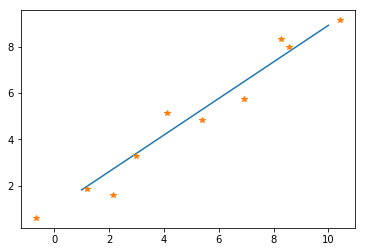

In [149]:
plt.plot(X_Test,Y_Pred)
plt.plot(X,Y,'*')